# Assignment 3: SVM

MIPT Master Program: ML Systems for Smart Production

Course: ML (Semester 1)

Assignment 1: **SVM**

Code by Dmitry Kochetkov

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

chips_path = './data/chips.csv'
geyser_path = './data/geyser.csv'

## Data Preparation

In [2]:
data = pd.read_csv(geyser_path)
print(data.shape)
scaler = StandardScaler()
data[['x', 'y']] = x = pd.DataFrame(scaler.fit_transform(data[['x', 'y']]), columns=['x', 'y'])

data['class'] = y = np.where(data['class'] == 'P', 1, -1)
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2)

(222, 3)


## Function for plotting decision regions

In [5]:
def plot_decision_regions(X, y, clf):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')

    plt.show()

## SVM with linear kernel

{'C': 1.0}


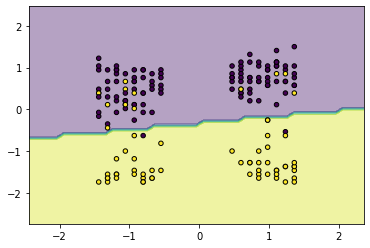

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

param_grid = {'C': np.array([0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0])}
svm = SVC(kernel='linear')
clf = GridSearchCV(svm, param_grid, scoring='accuracy')
clf.fit(x_train, y_train)
print(clf.best_params_)

plot_decision_regions(x_train[['x', 'y']], y_train, clf)

## SVM with polynomial kernel

{'C': 50.0, 'degree': 3}


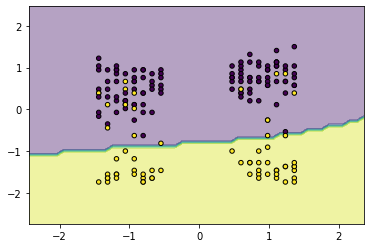

In [7]:
param_grid = {
    'C': np.array([0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]),
    'degree': np.array([2, 3, 4, 5])
}
svm = SVC(kernel='poly')
clf = GridSearchCV(svm, param_grid, scoring='accuracy')
clf.fit(x, y)
print(clf.best_params_)

plot_decision_regions(x_train[['x', 'y']], y_train, clf)

## SVM with Gaussian kernel

{'C': 0.05, 'gamma': 1}


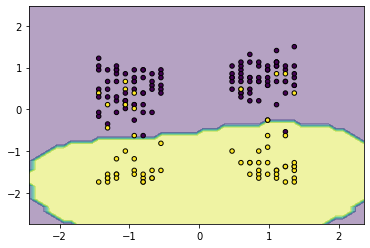

In [8]:
param_grid = {
    'C': np.array([0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]),
    'gamma': np.array([1, 2, 3, 4, 5])
}
svm = SVC(kernel='rbf')
clf = GridSearchCV(svm, param_grid, scoring='accuracy')
clf.fit(x_train, y_train)
print(clf.best_params_)

plot_decision_regions(x_train[['x', 'y']], y_train, clf)